<a href="https://colab.research.google.com/github/George0982/RNN-Predicao-Serie-Temporal-de-Manchas-Solares/blob/main/RNN_Predicao_Serie_Temporal_de_Manchas_Solares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A fonte possui a quantidade de manchas solares nos anos de 1749 a 1983, onde através dessa série temporal, pretende-se fazer uma nova predição, comparando a acertividade entre treino e teste.

In [ ]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
#Fonte do dataset: 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
#Utilização de 20% dos dados para teste
#Utilização da escala Min Max 0.1

def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)




In [ ]:
# Tamanho dos dados de treinamento
len(train_data)

2256

In [ ]:
#Dividindo a série temporal em vetores
#Considerando o número de steps passados como quantidade de steps futuros

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

Construindo uma rede recorrente com 3 unidades ocultas que utilizam 12 passos anteriores para estimar o atual estado.

O resultado é avaliado por um único neurônio totalmente conectado que nos dá a saída da rede

Função de ativação tanh em ambas as camadas da rede.

Como função objetiva, usaremos o erro médio quadrático, por se tratar de um problema de predição

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=1, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 3s - loss: 0.0209 - val_loss: 0.0415 - 3s/epoch - 16ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0127 - val_loss: 0.0322 - 910ms/epoch - 5ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0103 - val_loss: 0.0246 - 1s/epoch - 6ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0078 - val_loss: 0.0180 - 1s/epoch - 6ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0060 - val_loss: 0.0155 - 1s/epoch - 6ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0049 - val_loss: 0.0133 - 720ms/epoch - 4ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0047 - val_loss: 0.0124 - 723ms/epoch - 4ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0045 - val_loss: 0.0122 - 754ms/epoch - 4ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0043 - val_loss: 0.0125 - 806ms/epoch - 4ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0043 - val_loss: 0.0115 - 695ms/epoch - 4ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0043 - val_loss: 0.0115 - 670ms/epoch - 4ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0044 - val_loss: 0.0112 - 664ms/epoch - 4ms/step
Epoch 13/20


Avaliando o Treinamento Atráves do Erro Quadratico Médio

O erro quadrático médio (RMSE, do inglês Root Mean Squared Error) é uma métrica comumente usada para avaliar a precisão de um modelo de regressão. Ele mede a média das diferenças quadráticas entre os valores reais e os valores previstos pelo modelo.
O cálculo do RMSE envolve os seguintes passos:

- Para cada ponto de dados, calcule a diferença entre o valor real e o valor previsto pelo modelo.
- Eleve ao quadrado cada diferença calculada.
Calcule a média das diferenças quadráticas.
- Tome a raiz quadrada da média calculada.

O RMSE é uma métrica útil porque penaliza erros maiores de forma mais significativa do que erros menores. Quanto menor o valor do RMSE, melhor é a precisão do modelo.

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 6ms/step
Raíz do Erro Médio Quadrático para Treino: 0.063
Raíz do Erro Médio Quadrático para Teste: 0.100


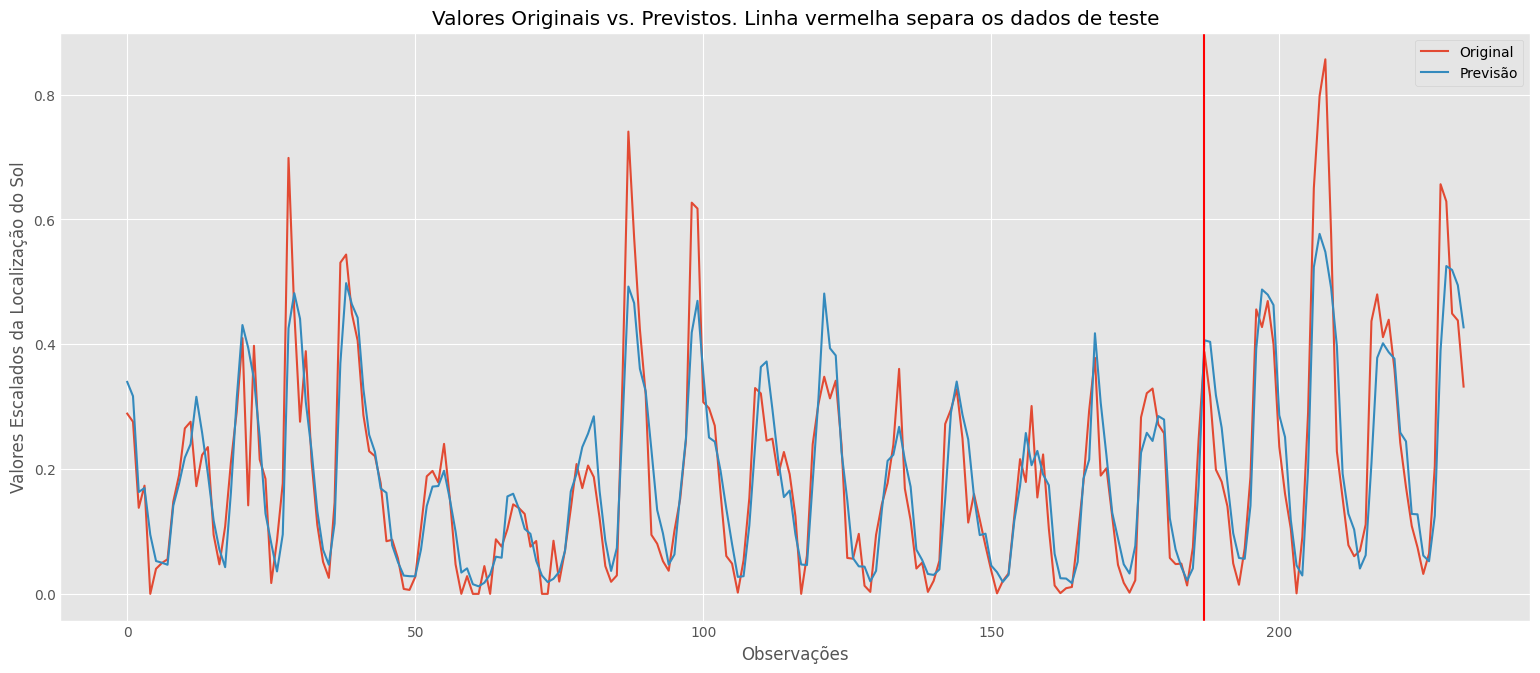

In [ ]:
#Comparando a série Temporal Com a Previsão

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=100)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict, test_predict)

Alterando a Quantidade de hidden_units para 5, é possível visualizar a diminuição do loss, val_loss e Raíz do Erro Médio Quadrático

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=5, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 3s - loss: 0.0217 - val_loss: 0.0357 - 3s/epoch - 16ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0097 - val_loss: 0.0184 - 650ms/epoch - 3ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0056 - val_loss: 0.0125 - 737ms/epoch - 4ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0048 - val_loss: 0.0113 - 712ms/epoch - 4ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0045 - val_loss: 0.0110 - 744ms/epoch - 4ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0045 - val_loss: 0.0105 - 784ms/epoch - 4ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0044 - val_loss: 0.0101 - 695ms/epoch - 4ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0043 - val_loss: 0.0098 - 789ms/epoch - 4ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0042 - val_loss: 0.0095 - 819ms/epoch - 4ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0042 - val_loss: 0.0093 - 1s/epoch - 5ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0041 - val_loss: 0.0091 - 1s/epoch - 6ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0041 - val_loss: 0.0090 - 1s/epoch - 6ms/step
Epoch 13/20


In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 7ms/step
Raíz do Erro Médio Quadrático para Treino: 0.060
Raíz do Erro Médio Quadrático para Teste: 0.088


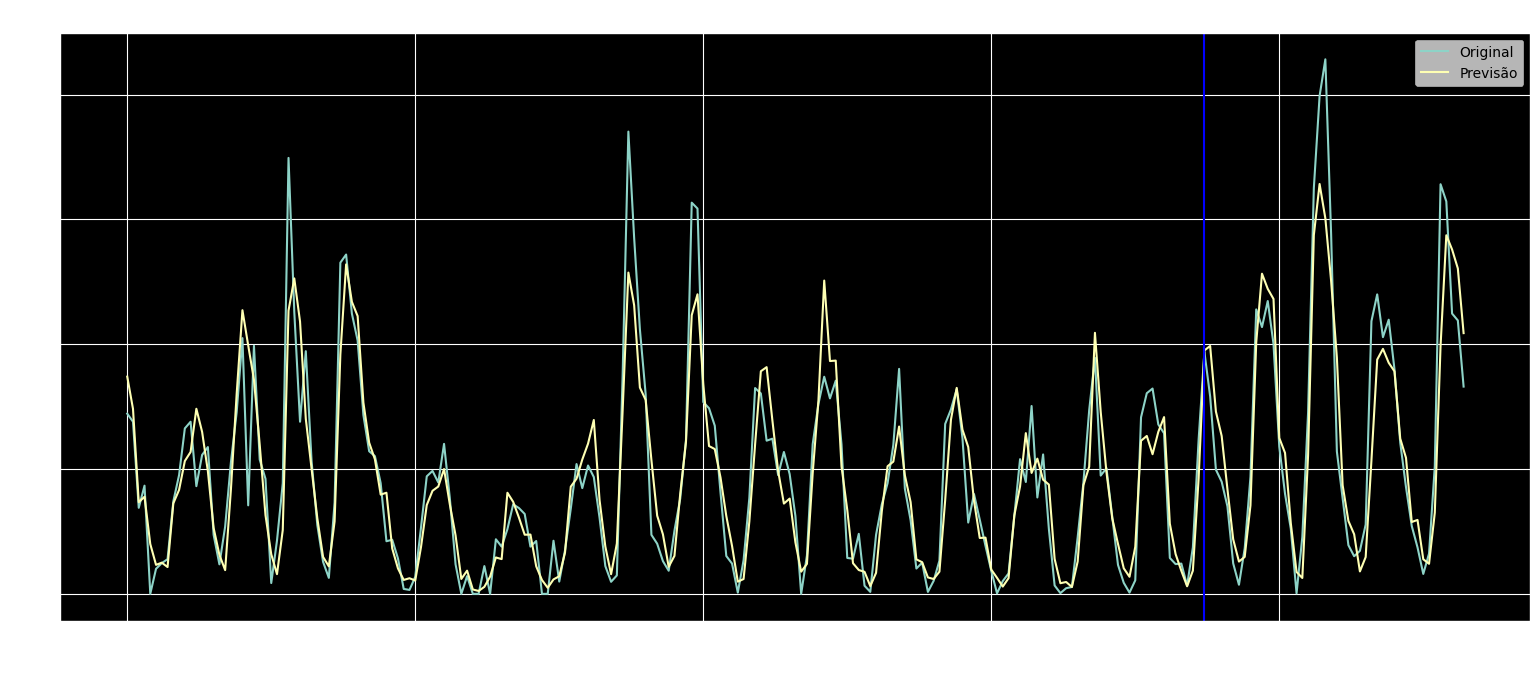

In [ ]:
#Comparando a série Temporal Com a Previsão

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=100)
    with plt.style.context('dark_background'):
        plt.plot(range(rows), actual)
        plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='b')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict, test_predict)


